In [1]:
# import pickle
# import seaborn as sns
# # from sklearn.decomposition import PCA
# import numpy as np
# # from scipy.stats import kstest
# import random
import dill
import pickle
# from train import PCAMonitoring

In [2]:
with open("../data/fashion-mnist/train.pickle", "rb") as f:
    X, y = pickle.load(f)

In [22]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [24]:
monitoring = PCAMonitoring(X)

In [25]:
with open("monitoring.dill", "wb") as f:
    dill.dump(monitoring, f)

In [3]:
with open("monitoring.dill", "rb") as f:
    monitoring1 = dill.load(f)


In [4]:
monitoring1.add_data(X[:100])

{'severity': 'WARNING', 'kstest': [(0.09055000000000002, 0.36333657177202766), (0.1411, 0.03363781106757089), (0.11533333333333334, 0.1291811499408007), (0.07856666666666667, 0.5413545135735524), (0.09121666666666672, 0.3546180757534074)], 'drifted_pcs': [1]}


In [4]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29039228, 0.46794538, 0.5281376 , 0.57771188, 0.61618843,
       0.65079612, 0.67421303, 0.69326717, 0.7067656 , 0.71990827,
       0.72983702, 0.73896957, 0.7466275 , 0.75322455, 0.75930306,
       0.76520127, 0.77072062, 0.77596562, 0.7805464 , 0.78510155,
       0.78943839, 0.79350936, 0.79735694, 0.80108246, 0.80469352,
       0.80820008, 0.8115325 , 0.81472609, 0.81780672, 0.82073945,
       0.82349548, 0.8261461 , 0.82878313, 0.83134148, 0.83380361,
       0.83616262, 0.83846552, 0.84072074, 0.8429055 , 0.84499874,
       0.84700157, 0.84895896, 0.85090586, 0.85273369, 0.85448723,
       0.85620649, 0.85789441, 0.85953416, 0.86114324, 0.8626917 ,
       0.86421465, 0.8657151 , 0.86718305, 0.86861617, 0.86999894,
       0.87136891, 0.87268046, 0.87396892, 0.87524141, 0.87649992,
       0.87771445, 0.87891643, 0.88009786, 0.88126044, 0.88241627,
       0.88353922, 0.88464997, 0.88574666, 0.88679794, 0.88784453,
       0.88887554, 0.88988605, 0.890864  , 0.89182089, 0.89276

In [11]:
with open("../data/fashion-mnist/test.pickle", "rb") as f:
    test_X, test_y = pickle.load(f)

In [6]:
test_X_pca = pca.transform(test_X)

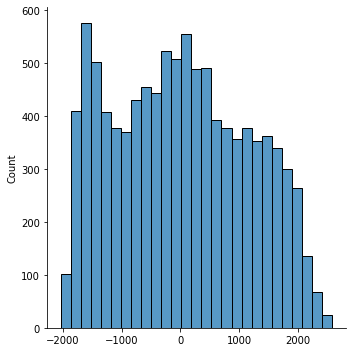

In [7]:
sns.displot(test_X_pca[:, 0])

In [8]:
for i in range(10):
    print(i, kstest(X_pca[:, i], test_X_pca[:100, i]))

0 KstestResult(statistic=0.0877, pvalue=0.40213041835323465)
1 KstestResult(statistic=0.056433333333333335, pvalue=0.8897048526095312)
2 KstestResult(statistic=0.08648333333333333, pvalue=0.4194233438398268)
3 KstestResult(statistic=0.07341666666666669, pvalue=0.626980189721019)
4 KstestResult(statistic=0.08103333333333335, pvalue=0.5017959842511743)
5 KstestResult(statistic=0.060450000000000004, pvalue=0.8364945812064387)
6 KstestResult(statistic=0.11414999999999999, pvalue=0.1365209003963018)
7 KstestResult(statistic=0.06343333333333334, pvalue=0.7918993318300346)
8 KstestResult(statistic=0.15183333333333338, pvalue=0.017722835149347794)
9 KstestResult(statistic=0.10009999999999997, pvalue=0.2516703465536239)


In [9]:
test_X1 = np.array(test_X) + 100#np.array([[random.randint(120,500) for _ in range(28*28)] for _ in range(100)])

In [10]:
test_X1_pca = pca.transform(test_X1)

In [11]:
[tuple(kstest(X_pca[:, i], test_X1_pca[:100, i])) for i in range(10)]

[(0.5638333333333333, 1.5926200584508776e-30),
 (0.44833333333333336, 7.42267813217519e-19),
 (0.3233999999999999, 8.273205247995599e-10),
 (0.13811666666666667, 0.03985940830562845),
 (0.15404999999999996, 0.015434568064417361),
 (0.39111666666666667, 2.7212910968851327e-14),
 (0.8222333333333334, 7.219803121151552e-75),
 (0.2483333333333333, 6.422163526398293e-06),
 (0.5073333333333333, 2.2380829987820278e-24),
 (0.4731000000000001, 4.554413516824947e-21)]

In [7]:
from train import PCAMonitoring

In [9]:
monitoring = PCAMonitoring(X)

In [12]:

monitoring.add_data(test_X[:100])

{'severity': 'INFO', 'kstest': [(0.0877, 0.40213041835323465), (0.056433333333333335, 0.8897048526095312), (0.08648333333333333, 0.4194233438398268), (0.07341666666666669, 0.626980189721019), (0.08103333333333335, 0.5017959842511743)], 'drifted_pcs': []}


In [13]:
with open("monitoring.dill", "wb") as f:
    dill.dump(monitoring, f)

In [1]:
import json
import random

In [3]:
x = [random.randint(0, 255) for _ in range(28*28)]
json.dumps({
    "instances": [x]
})

'{"instances": [[141, 151, 83, 117, 233, 172, 176, 191, 108, 35, 89, 169, 231, 39, 2, 63, 149, 165, 203, 68, 87, 243, 157, 204, 198, 23, 167, 27, 104, 169, 112, 82, 163, 87, 155, 129, 202, 203, 244, 168, 46, 223, 182, 5, 129, 81, 168, 159, 30, 30, 229, 85, 157, 22, 142, 123, 42, 223, 192, 174, 242, 242, 195, 213, 153, 41, 208, 252, 218, 88, 226, 118, 216, 9, 53, 253, 69, 47, 149, 5, 51, 220, 188, 172, 108, 148, 95, 121, 131, 117, 23, 88, 219, 12, 19, 91, 202, 191, 162, 76, 17, 106, 245, 217, 214, 125, 170, 5, 112, 45, 129, 174, 184, 169, 208, 236, 77, 229, 74, 143, 204, 73, 163, 28, 68, 86, 163, 210, 186, 237, 164, 207, 14, 233, 21, 235, 29, 41, 88, 91, 71, 175, 42, 146, 143, 165, 43, 96, 245, 224, 50, 228, 10, 5, 206, 17, 199, 111, 226, 49, 245, 149, 216, 168, 26, 213, 244, 156, 62, 178, 28, 40, 208, 205, 234, 187, 18, 196, 142, 108, 114, 40, 2, 80, 143, 33, 63, 36, 118, 208, 145, 157, 209, 84, 33, 143, 241, 104, 51, 207, 253, 105, 216, 177, 206, 249, 109, 199, 49, 95, 24, 89, 173, 82